In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree

# Exercise 1 : simple dataset with 2 features (same as previous TP)

## Load the data

In [77]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')
data

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


## Train / Valid / Test split

In [78]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)
# 82 examples in train, 18 in valid and 18 in test

## Plotting the training set

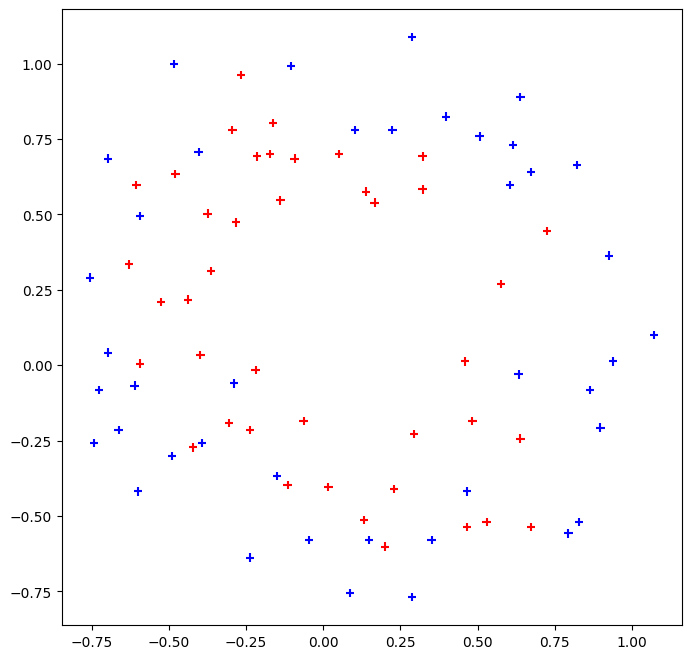

In [79]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

## Fitting a decision tree

In [80]:
# The basic decision tree can be obtained easily by this command
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,:2],data_train.Y)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)


## Visualizing the obtained tree

[Text(0.6071428571428571, 0.9545454545454546, 'x[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.5595238095238095, 0.8636363636363636, 'x[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.5119047619047619, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6071428571428571, 0.7727272727272727, 'x[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.30952380952380953, 0.6818181818181818, 'x[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.09523809523809523, 0.5909090909090909, 'x[0] <= 0.175\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.047619047619047616, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.244\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.52

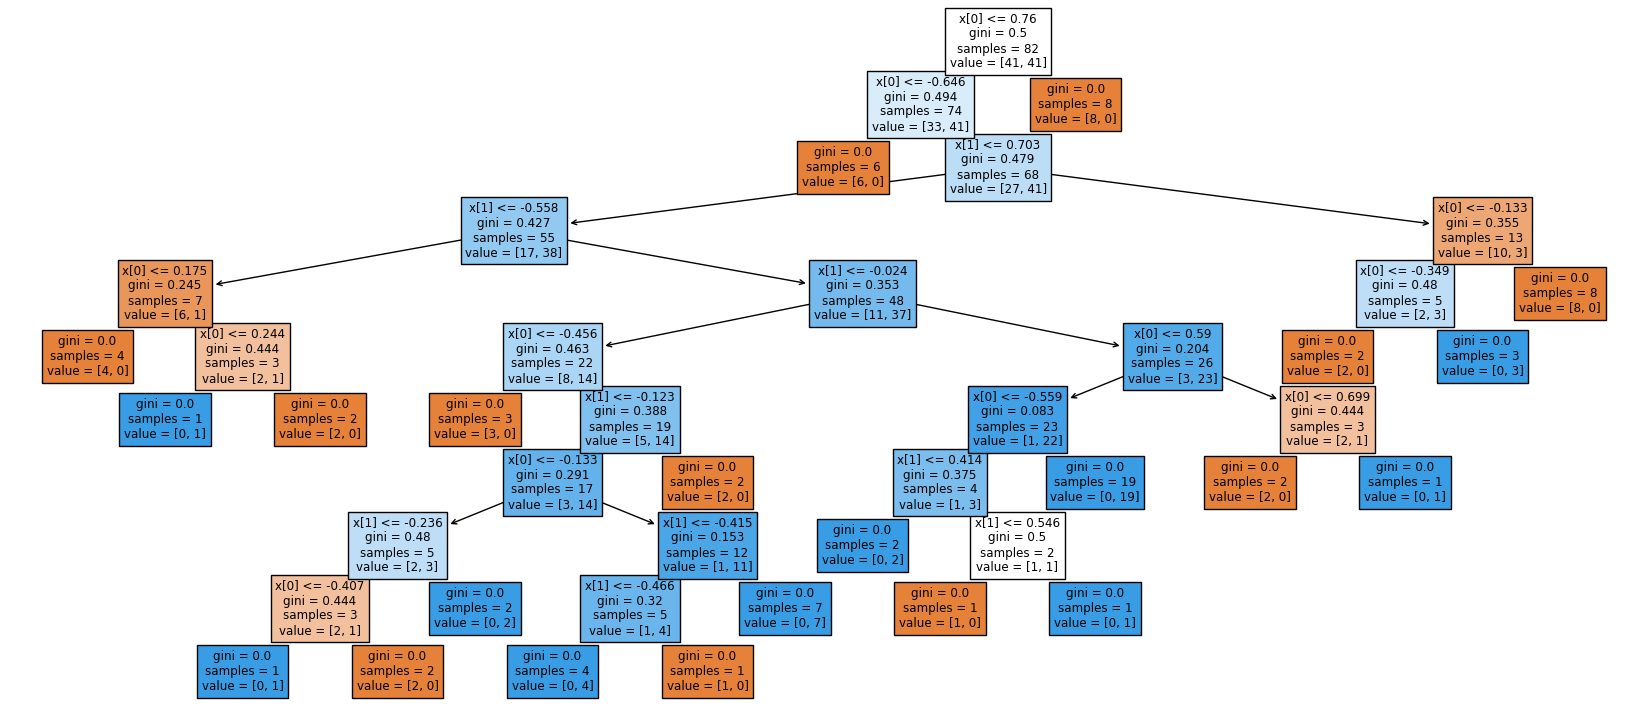

In [81]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
# The 'plot_tree' function outputs two things : 
# - a text version of the tree (where are written the informations about all the nodes of the tree)
# - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

In [82]:
print("Gini= 0,5")
print("Nombre de le feuilles:")
print(dt.get_n_leaves())


Gini= 0,5
Nombre de le feuilles:
22


In [83]:
data_train

,X1,X2,Y
98,-0.66302,-0.214180,0
88,-0.69758,0.041667,0
11,-0.11578,-0.396930,1
4,0.22984,-0.411550,1
65,0.82316,0.663010,0
...,...,...,...
104,0.10311,0.779970,0
1,-0.47869,0.633770,1
69,0.60426,0.597220,0
55,-0.60541,0.597220,1


In [84]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command (as for logistic regression):
dt.predict(data_train.iloc[:1,:2]) # here I ask to predict the first example of the train set, need to give its features

array([0])

In [85]:
dt.score(data_train.iloc[:,0:2], data_train.Y)

1.0

In [86]:
dt.score(data_valid.iloc[:,0:2], data_valid.Y)

0.8333333333333334

In [87]:
def draw_boundary_tree(model, data, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


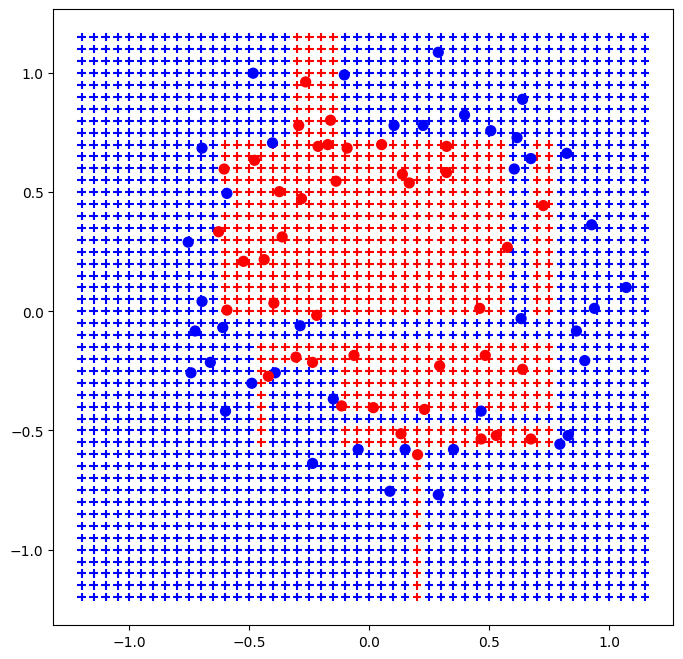

In [88]:
draw_boundary_tree(dt, data_train, -1.2, 1.2, -1.2, 1.2)

## Pruning the tree

In [89]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.0077766 , 0.01045296, 0.01117886, 0.01263351,
        0.01626016, 0.02513799, 0.02727425, 0.02814259, 0.05398197,
        0.05405405]),
 'impurities': array([0.        , 0.0233298 , 0.04423572, 0.06659345, 0.10449397,
        0.12075413, 0.14589213, 0.22771487, 0.28400004, 0.44594595,
        0.5       ])}

Text(0, 0.5, 'total impurity of leaves')

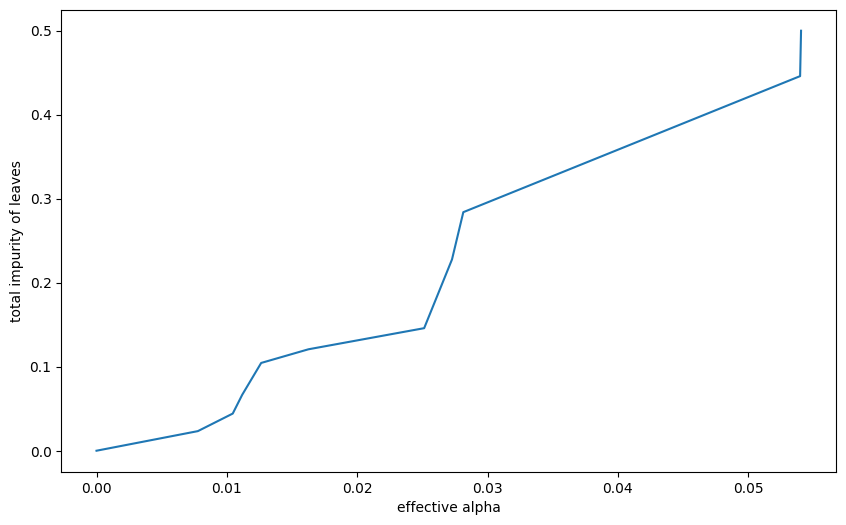

In [90]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [91]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)
# Here I asked for the third value from all the possible alpha (the first one is 0, already done with the basic tree)

0.8333333333333334
0.975609756097561


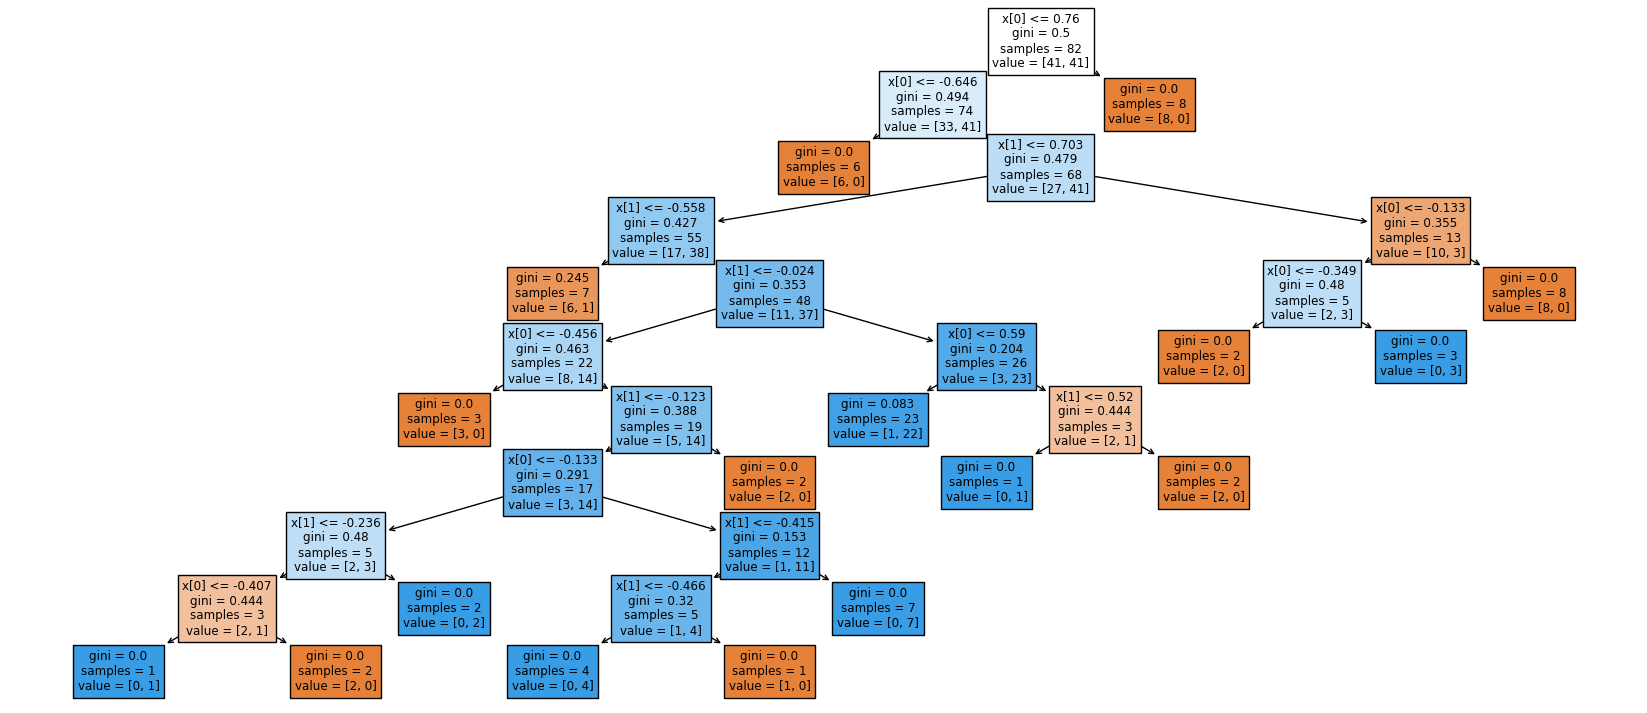

In [92]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt_pruned, filled=True)
# The 'plot_tree' function outputs two things : 
# - a text version of the tree (where are written the informations about all the nodes of the tree)
# - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

print(dt_pruned.score(data_valid.iloc[:,0:2], data_valid.Y))
print(dt_pruned.score(data_train.iloc[:,0:2], data_train.Y))

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


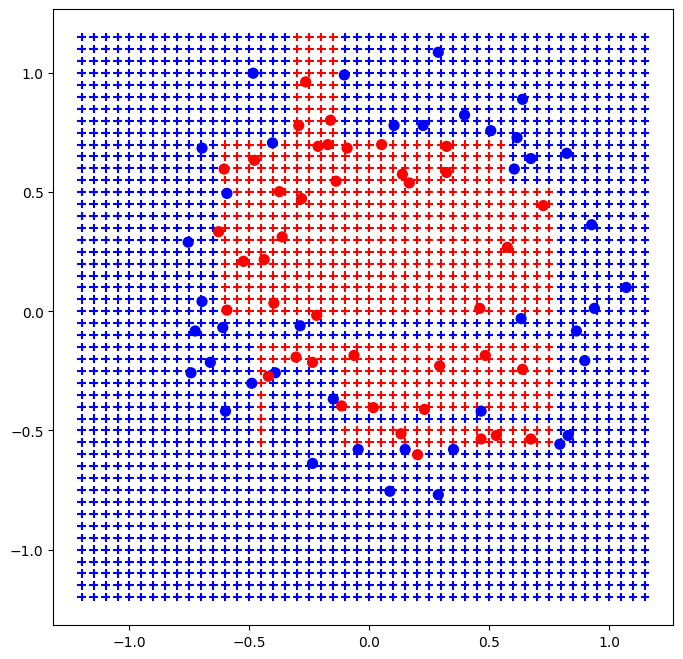

In [93]:
draw_boundary_tree(dt_pruned, data_train, -1.2, 1.2, -1.2, 1.2)

In [98]:

def best_tree(data_train,data_valid,Y,deb,limit):
    result=pd.DataFrame()
    ccp_alphas_train = []
    score_train = []
    score_valid = []

    for i in range (len(ccp_alphas)):
        dt_pruned_train = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[i]).fit(data_train.iloc[:,deb:limit], data_train[Y])
        ccp=path.ccp_alphas[i]
        data_train.columns = data_train.columns.astype(str)
        data_valid.columns = data_valid.columns.astype(str)
        score_t=dt_pruned_train.score(data_train.iloc[:,deb:limit], data_train[Y])
        score_v=dt_pruned_train.score(data_valid.iloc[:,deb:limit], data_valid[Y])
        ccp_alphas_train.append(ccp) 
        score_train.append(score_t)
        score_valid.append(score_v)
    
    result['ccp_alpha']= ccp_alphas_train
    result['score_train']= score_train 
    result['score_valid']= score_valid
    best_index = result['score_valid'].idxmax()
    best_tree=dt_pruned_train = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[best_index]).fit(data_train.iloc[:,deb:limit], data_train[Y])
    return result,best_tree

score_train = best_tree(data_train,data_valid,'Y',0,2)[0]['score_train']
score_valid = best_tree(data_train,data_valid,'Y',0,2)[0]['score_valid']
test=best_tree(data_train,data_valid,'Y',0,2)
test
#Question_dev

(    ccp_alpha  score_train  score_valid
 0    0.000000     1.000000     0.833333
 1    0.007777     0.987805     0.833333
 2    0.010453     0.975610     0.833333
 3    0.011179     0.963415     0.833333
 4    0.012634     0.939024     0.888889
 5    0.016260     0.926829     0.888889
 6    0.025138     0.914634     0.888889
 7    0.027274     0.853659     0.888889
 8    0.028143     0.817073     0.888889
 9    0.053982     0.597561     0.500000
 10   0.054054     0.500000     0.666667,
 DecisionTreeClassifier(ccp_alpha=0.012633508688028058))

Text(0, 0.5, 'total impurity of leaves')

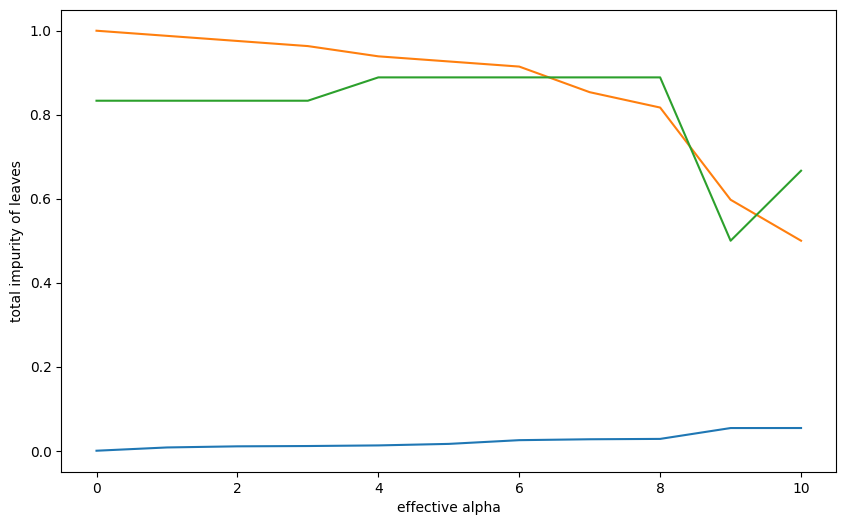

In [95]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas)
plt.plot(score_train)
plt.plot(score_valid)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

[Text(0.6333333333333333, 0.9545454545454546, 'x[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.5666666666666667, 0.8636363636363636, 'x[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.5, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6333333333333333, 0.7727272727272727, 'x[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.4, 0.6818181818181818, 'x[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.3333333333333333, 0.5909090909090909, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.4666666666666667, 0.5909090909090909, 'x[1] <= -0.024\ngini = 0.353\nsamples = 48\nvalue = [11, 37]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -0.456\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.26666666666666666, 0.4090909090909091, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4, 0.4090909090909091, 'x[1] <= -0.123\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.333333333

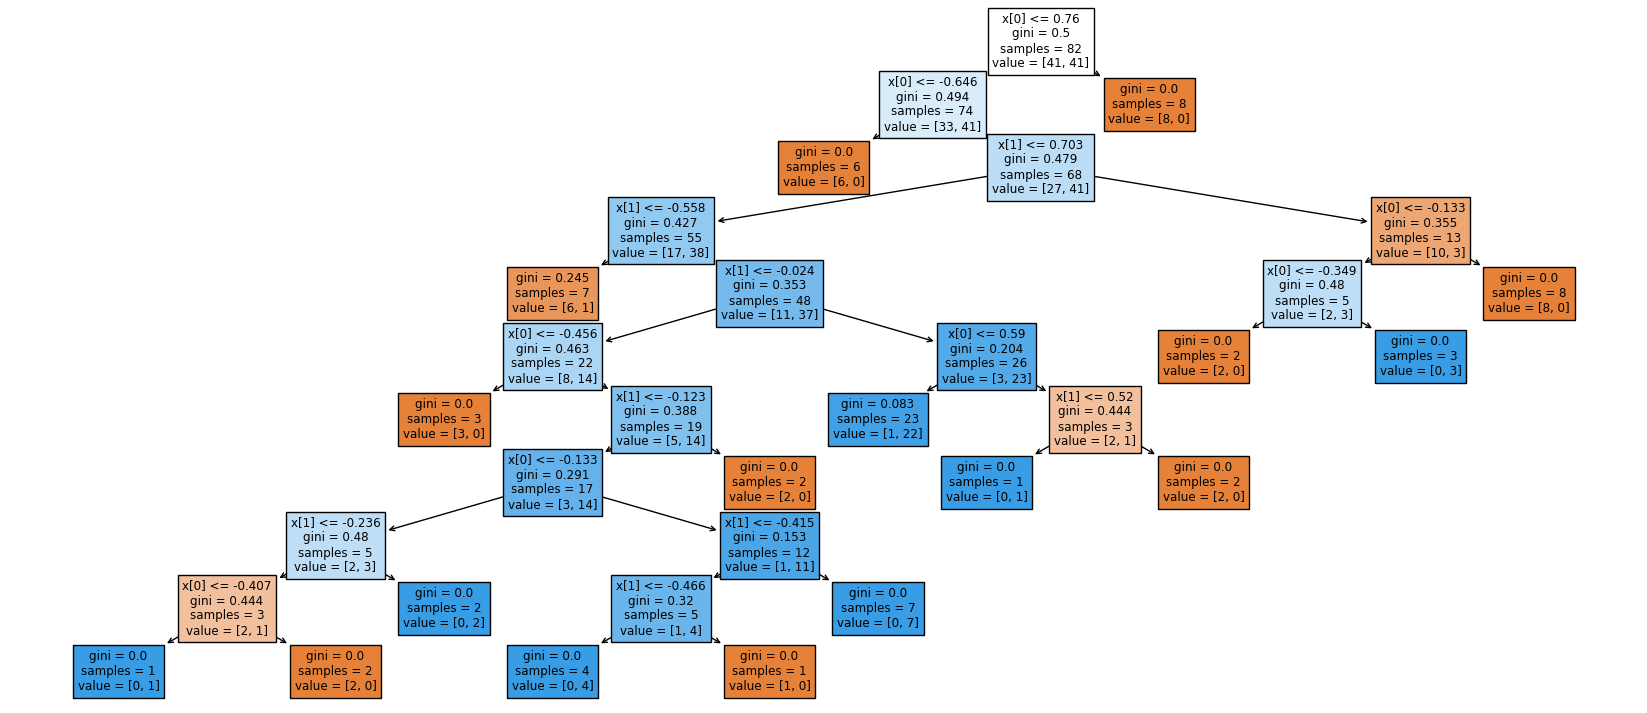

In [101]:
dt_best_pruned= tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[4]).fit(data_train.iloc[:,0:2], data_train.Y)
plt.figure(figsize=(21, 9))
tree.plot_tree(dt_pruned, filled=True)

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


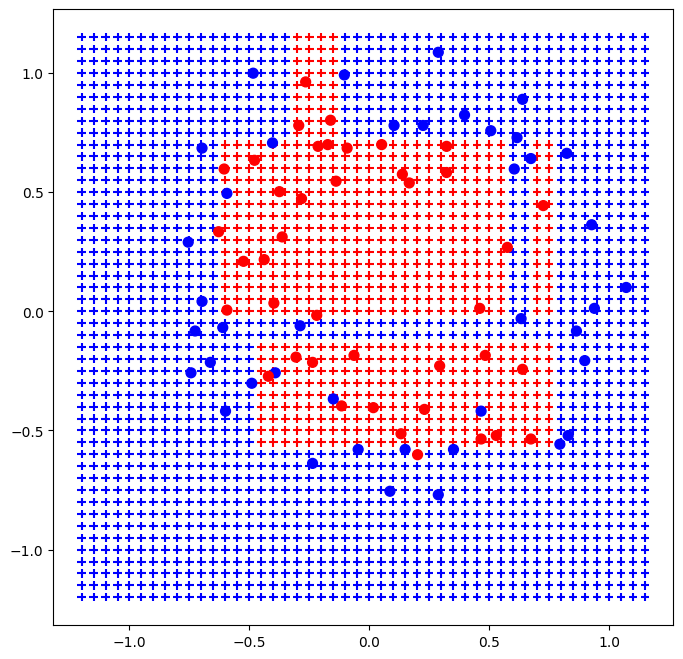

In [ ]:
draw_boundary_tree(dt_best_pruned, data_train, -1.2, 1.2, -1.2, 1.2)

# Exercise 2 : with a real dataset of handwritten digits

In [ ]:
mnist = pd.read_csv('cp_sample.csv', sep=';')
mnist.shape

(1000, 785)

In [ ]:

print(mnist['label'].value_counts(normalize=True))
print(mnist['label'].value_counts(normalize=False))

2    0.121
1    0.113
4    0.104
3    0.100
8    0.100
0    0.097
7    0.094
6    0.091
5    0.091
9    0.089
Name: label, dtype: float64
2    121
1    113
4    104
3    100
8    100
0     97
7     94
6     91
5     91
9     89
Name: label, dtype: int64


In [ ]:
# The values of pixels and label for one image can be obtained by the command:
mnist.iloc[0,:] # First image of the dataset
# You can see that the label is in the column 'label' and the other columns are pixel0, pixel1, etc...
# This first image represents the digit 1

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

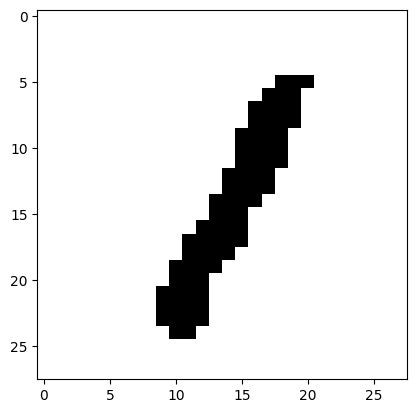

In [103]:
# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

In [ ]:
mnist_train, mnist_test = train_test_split(mnist, test_size = 0.3, random_state = 4)
mnist_valid, mnist_test = train_test_split(mnist_test, test_size = 0.5, random_state = 4)
# 82 examples in train, 18 in valid and 18 in test

In [ ]:
# The basic decision tree can be obtained easily by this command
mnist_tree = tree.DecisionTreeClassifier().fit(mnist_train.iloc[:,1:mnist.shape[1]],mnist_train.label)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)

In [ ]:
mnist_score_train=mnist_tree.score(mnist_train.iloc[:,1:mnist.shape[1]], mnist_train.label)
mnist_score_train

1.0

In [ ]:
mnist_score_valid=mnist_tree.score(mnist_valid.iloc[:,1:mnist.shape[1]], mnist_valid.label)
mnist_score_valid

0.62

In [ ]:
lim=mnist.shape[1]
mnist_best_tree=best_tree(mnist_train,mnist_valid,"label",1,lim)[1]
best_tree(mnist_train,mnist_valid,"label",1,lim)[0]

,ccp_alpha,score_train,score_valid
0,0.000000,1.000000,0.646667
1,0.007777,0.651429,0.486667
2,0.010453,0.622857,0.513333
3,0.011179,0.604286,0.486667
4,0.012634,0.604286,0.486667
5,0.016260,0.577143,0.486667
6,0.025138,0.540000,0.473333
7,0.027274,0.540000,0.473333
8,0.028143,0.540000,0.473333
9,0.053982,0.117143,0.146667


In [ ]:
#Score on test data
error_gen= 1-(mnist_best_tree.score(mnist_test.iloc[:,1:mnist.shape[1]], mnist_test.label))
print(error_gen)

0.41333333333333333


## Trying the model on your own written image 

In [ ]:
import skimage.io
def read_myimage(f):
    myimage = skimage.io.imread(f, as_gray=True)
    i0 = np.where(myimage==0)
    i1 = np.where(myimage == 1)
    myimage[i0] = 1
    myimage[i1] = 0
    plt.imshow(myimage, cmap='Greys')
    return myimage.reshape(1,28*28)

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([7])

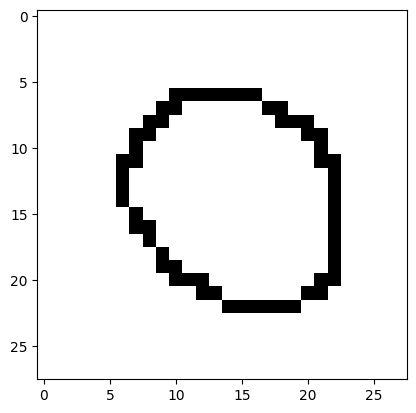

In [ ]:
myim = read_myimage('test_0.png')
mnist_best_tree.predict(myim) # if dt is the name of your model

## Logistic regression for the same task

In [ ]:
mnist_lr_model = LogisticRegression().fit(mnist_train.iloc[:,1:mnist_train.shape[1]], mnist_train.label)
error_gen_lr_model = 1-mnist_lr_model.score(mnist_test.iloc[:,1:mnist.shape[1]], mnist_test.label)
error_gen_lr_model

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10666666666666669

In [ ]:
# Prédisez avec le modèle
mnist_lr_model.predict(myim)


/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Using HOG representation rather than pixel values

In [ ]:
from skimage.feature import hog

In [104]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1),channel_axis=2)
myimage_hog

array([0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.63453054, 0.        ,
       0.63453054, 0.        , 0.44129581, 0.        , 0.        ,
       0.        , 0.59539679, 0.        , 0.59539679, 0.        ,
       0.23002187, 0.        , 0.48795006, 0.        , 0.70710678,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),channel_axis=2)))

In [ ]:
hog_train = mnist_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= mnist_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = mnist_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = mnist_train.label
hog_valid['label'] = mnist_valid.label
hog_test['label'] = mnist_test.label

In [ ]:
hog_train
# you see here that each image of the training set is now a vector of length 32

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
715,0.502681,0.0,0.502681,0.0,0.491869,0.0,0.502681,0.0,0.331770,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,8
920,0.699372,0.0,0.699372,0.0,0.147506,0.0,0.000000,0.0,0.500000,0.0,...,0.0,0.681478,0.0,0.681478,0.0,0.000000,0.0,0.266785,0.0,9
295,0.465444,0.0,0.618883,0.0,0.618883,0.0,0.131647,0.0,0.500000,0.0,...,0.0,0.307510,0.0,0.543607,0.0,0.552236,0.0,0.552236,0.0,2
83,0.517744,0.0,0.517744,0.0,0.517744,0.0,0.442518,0.0,0.568812,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0
942,0.604642,0.0,0.604642,0.0,0.377247,0.0,0.355672,0.0,0.603838,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0.555912,0.0,...,0.0,0.572579,0.0,0.572579,0.0,0.572579,0.0,0.128290,0.0,0
709,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.615943,0.0,...,0.0,0.656532,0.0,0.754298,0.0,0.000000,0.0,0.000000,0.0,1
439,0.707107,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.566947,0.0,...,0.0,0.558947,0.0,0.558947,0.0,0.558947,0.0,0.250470,0.0,0
174,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.197028,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,5


In [ ]:
hog_best_tree=best_tree(hog_train,hog_valid,'label',0,31)[1]

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
error_gen_hog= 1-(hog_best_tree.score(hog_test.iloc[:,0:31], hog_test['label']))
print(error_gen_hog)

0.42666666666666664


/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
hog_train = mnist_train.apply(my_hog, axis=1, args=(12,7))
hog_valid= mnist_valid.apply(my_hog, axis=1, args=(12,7))
hog_test = mnist_test.apply(my_hog, axis=1, args=(12,7))
hog_train['label'] = mnist_train.label
hog_valid['label'] = mnist_valid.label
hog_test['label'] = mnist_test.label

In [ ]:
hog_best_tree=best_tree(hog_train,hog_valid,'label',0,31)[1]

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
error_gen_hog= 1-(hog_best_tree.score(hog_test.iloc[:,0:31], hog_test['label']))
print(error_gen_hog)

0.6333333333333333


/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
hog_test

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,label
578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.672127,0.0,0.0,0.331133,0.0,0.0,0.0,0.0,0.0,8
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,7
950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,7
714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [ ]:

hog_train.columns = hog_train.columns.astype(str)
hog_test.columns = hog_test.columns.astype(str)


hog_lr_model = LogisticRegression().fit(hog_train.iloc[:, 0:hog_train.shape[1]], hog_train['label'])


accuracy = hog_lr_model.score(hog_test.iloc[:, 0:hog_test.shape[1]], hog_test['label'])

error_gen_lr_model = 1-accuracy
error_gen_lr_model



/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.040000000000000036

In [107]:
hog_lr_model.predict(myim)
#question_dev

/Users/freuxy/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 784 features, but LogisticRegression is expecting 193 features as input.